In [35]:
from tensorflow.keras.datasets import fashion_mnist
from keras import metrics
import numpy as np
from keras import layers
from keras import models
from tensorflow.keras.utils import to_categorical

Частина 1

In [36]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [37]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.shape

(60000, 28, 28)

In [38]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [39]:
train_labels[25:28]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
model = models.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten_4 (Flatten)         (None, 7744)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                495680    
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                      

In [42]:
model.compile(
    optimizer="rmsprop",   #"Adam"
    loss="categorical_crossentropy",
    metrics=["accuracy", metrics.Recall(), metrics.Precision(), metrics.F1Score(),
    ],
)

In [43]:
epochs = 30

In [44]:
history = model.fit(train_data, train_labels, 
                    batch_size=128, 
                    epochs=epochs,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/30
375/375 [==============================] - 7s 16ms/step - loss: 0.5260 - accuracy: 0.8127 - recall: 0.7558 - precision: 0.8703 - f1_score: 0.8115 - val_loss: 0.3568 - val_accuracy: 0.8701 - val_recall: 0.8510 - val_precision: 0.8939 - val_f1_score: 0.8642
Epoch 2/30
375/375 [==============================] - 6s 16ms/step - loss: 0.3236 - accuracy: 0.8825 - recall: 0.8628 - precision: 0.9038 - f1_score: 0.8822 - val_loss: 0.2955 - val_accuracy: 0.8924 - val_recall: 0.8754 - val_precision: 0.9122 - val_f1_score: 0.8923
Epoch 3/30
375/375 [==============================] - 6s 15ms/step - loss: 0.2693 - accuracy: 0.9010 - recall: 0.8871 - precision: 0.9175 - f1_score: 0.9008 - val_loss: 0.2639 - val_accuracy: 0.9059 - val_recall: 0.8918 - val_precision: 0.9221 - val_f1_score: 0.9059
Epoch 4/30
375/375 [==============================] - 6s 15ms/step - loss: 0.2367 - accuracy: 0.9132 - recall: 0.9013 - precision: 0.9266 - f1_score: 0.9130 - val_loss: 0.2600 - val_accuracy: 0.9045 

In [45]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'recall', 'precision', 'f1_score', 'val_loss', 'val_accuracy', 'val_recall', 'val_precision', 'val_f1_score'])


In [46]:
loss = history.history["loss"][epochs - 1]
accuracy = history.history["accuracy"][epochs - 1]
recall = history.history["recall"][epochs - 1]
presicion = history.history["precision"][epochs - 1]
f1_score = history.history["f1_score"][epochs - 1]
print(
    f"Функція втрат: {loss:.3f} \nAccuracy: {accuracy*100:.2f}% \nПовнота (recall): {recall:.3f} \nТочність (presicion): {presicion:.3f}, \nF-міра (міра точності): {f1_score.mean():.3f}"
)


Функція втрат: 0.009 
Accuracy: 99.74% 
Повнота (recall): 0.997 
Точність (presicion): 0.997, 
F-міра (міра точності): 0.997


In [47]:
loss, accuracy, recall, presicion, f1_score = model.evaluate(
    test_data[-2000:], test_labels[-2000:], verbose=1
)
print(
    f"Метріки, розраховані на тестових даних: \nФункція втрат: {loss:.2f} \nAccuracy: {accuracy*100:.2f}% \nПовнота (recall): {recall:.2f} \nТочність (presicion): {presicion:.2f}, \nF-міра (міра точності): {f1_score.mean():.2f}"
)


63/63 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.9225 - recall: 0.9225 - precision: 0.9230 - f1_score: 0.9220
Метріки, розраховані на тестових даних: 
Функція втрат: 0.54 
Accuracy: 92.25% 
Повнота (recall): 0.92 
Точність (presicion): 0.92, 
F-міра (міра точності): 0.92


В попередній роботі була створена повнозв'язкова нейронна мережа (модель багатошарового персептрону) на основі датасету fashion_mnist для класифікаціїї зображень одягу. Та мережа мала наступні значення метрик: Функція втрат 0.14 / Accuracy 94.69% / Повнота (recall) 0.94 / Точність (presicion) 0.95 
В данній роботі була отримана аналогічна згорткова мережа на основі датасету fashion_mnist. При однковій кількості епох, розміру батча згорткова мережа має більш високі значення метрик і меншу функцію втрат.  

Частина 2

In [6]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from keras import models
from keras.applications import VGG16;
import os
import tensorflow as tf
from keras import metrics
from keras import layers
from keras import optimizers

In [51]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [52]:
train_data.shape

(60000, 28, 28)

In [53]:
train_data = tf.expand_dims(train_data, axis=3)
test_data = tf.expand_dims(test_data, axis=3)
train_data.shape

TensorShape([60000, 28, 28, 1])

In [54]:
train_data_rgb = tf.image.grayscale_to_rgb(train_data)
test_data_rgb = tf.image.grayscale_to_rgb(test_data)
train_data_rgb.shape

TensorShape([60000, 28, 28, 3])

In [55]:
# tf.image.resize(train_data_rgb, 32, 32)

train_data = tf.image.resize_with_pad(train_data_rgb, 32, 32) / 255.0
test_data = tf.image.resize_with_pad(test_data_rgb, 32, 32) / 255.0
train_data.shape

TensorShape([60000, 32, 32, 3])

In [19]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [73]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

In [74]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [23]:
model = models.Sequential(
    [
        conv_base,
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

model.compile(
    loss="categorical_crossentropy",
    # optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["acc", metrics.F1Score()],
)

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [25]:
history = model.fit(
    train_data,
    train_labels,
    epochs=50,
    batch_size=128,
    validation_split=0.25
)

Epoch 1/50


352/352 [==============================] - 128s 359ms/step - loss: 0.6191 - acc: 0.7885 - f1_score: 0.7875 - val_loss: 0.4897 - val_acc: 0.8237 - val_f1_score: 0.8197
Epoch 2/50
352/352 [==============================] - 126s 358ms/step - loss: 0.4366 - acc: 0.8417 - f1_score: 0.8413 - val_loss: 0.4282 - val_acc: 0.8481 - val_f1_score: 0.8447
Epoch 3/50
352/352 [==============================] - 126s 357ms/step - loss: 0.3990 - acc: 0.8534 - f1_score: 0.8531 - val_loss: 0.4212 - val_acc: 0.8467 - val_f1_score: 0.8479
Epoch 4/50
352/352 [==============================] - 173s 492ms/step - loss: 0.3750 - acc: 0.8616 - f1_score: 0.8614 - val_loss: 0.3951 - val_acc: 0.8581 - val_f1_score: 0.8584
Epoch 5/50
352/352 [==============================] - 127s 361ms/step - loss: 0.3587 - acc: 0.8677 - f1_score: 0.8674 - val_loss: 0.3956 - val_acc: 0.8559 - val_f1_score: 0.8557
Epoch 6/50
352/352 [==============================] - 126s 360ms/step - loss: 0.3437 - acc: 0.8747 - f1_scor

In [26]:
model.save('fashion_mnist_vgg16_Adam_256_50epochs.h5')

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
model.save('fashion_mnist_vgg16_Adam_256_50epochs.keras')

In [28]:
history.history.keys()

dict_keys(['loss', 'acc', 'f1_score', 'val_loss', 'val_acc', 'val_f1_score'])

In [29]:
def history_acc_loss():
    acc = history.history["acc"]


    val_acc = history.history["val_acc"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(acc) + 1)

    plt.plot(
        epochs, acc, "bo", label="Точність на тренуванні"
    )  # Графік точності на тренувальних данних
    plt.plot(
        epochs, val_acc, "b", label="Точність на валідації"
    )  # Графік точності на валідаційних данних
    plt.title("Точність тренування і валідації")  # Заголовок графіку
    plt.legend()  # Показати легенду

    plt.figure()

    plt.plot(
        epochs, loss, "bo", label="Втрати на тренуванні"
    )  # Графік втрат на тренувальних данних
    plt.plot(
        epochs, val_loss, "b", label="Втрати на валідації"
    )  # Графік втрат на валідаційних данних
    plt.title("Втрати тренування і валідації")  # Заголовок графіку
    plt.legend()  # Показати легенду

    plt.show()  # Відобразити графіки

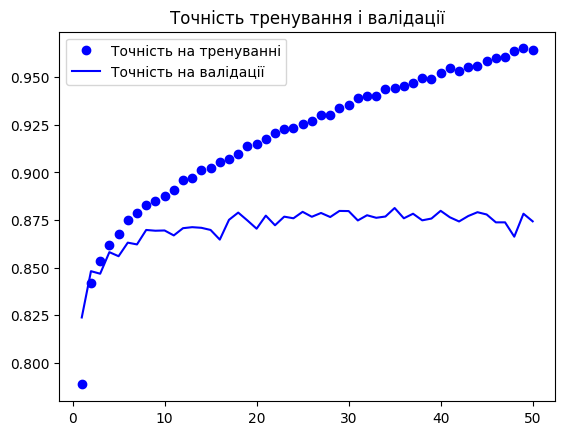

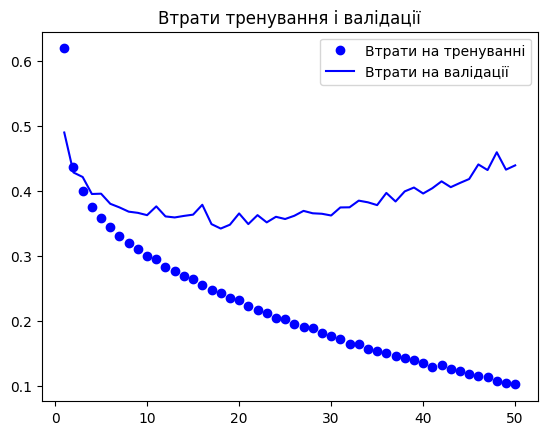

In [33]:
history_acc_loss()

In [75]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [76]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block3_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

completed_model = models.Sequential(
    [
        conv_base,
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [77]:
completed_model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["acc", metrics.F1Score()],
)

In [38]:
history = completed_model.fit(
    train_data,
    train_labels,
    epochs=30,
    validation_split=0.25,
)

Epoch 1/30
1407/1407 [==============================] - 320s 227ms/step - loss: 0.7126 - acc: 0.7309 - f1_score: 0.7285 - val_loss: 0.4931 - val_acc: 0.8321 - val_f1_score: 0.8259
Epoch 2/30
1407/1407 [==============================] - 317s 225ms/step - loss: 0.4070 - acc: 0.8620 - f1_score: 0.8612 - val_loss: 0.4931 - val_acc: 0.8218 - val_f1_score: 0.8232
Epoch 3/30
1407/1407 [==============================] - 320s 228ms/step - loss: 0.3599 - acc: 0.8796 - f1_score: 0.8791 - val_loss: 0.3697 - val_acc: 0.8766 - val_f1_score: 0.8781
Epoch 4/30
1407/1407 [==============================] - 316s 225ms/step - loss: 0.3175 - acc: 0.8913 - f1_score: 0.8909 - val_loss: 0.3545 - val_acc: 0.8905 - val_f1_score: 0.8878
Epoch 5/30
1407/1407 [==============================] - 316s 224ms/step - loss: 0.2985 - acc: 0.9001 - f1_score: 0.8999 - val_loss: 0.3011 - val_acc: 0.8953 - val_f1_score: 0.8938
Epoch 6/30
1407/1407 [==============================] - 313s 222ms/step - loss: 0.2862 - acc: 0.9040

In [42]:
model_score = completed_model.evaluate(test_data, test_labels)

313/313 [==============================] - 20s 64ms/step - loss: 0.3228 - acc: 0.9178 - f1_score: 0.9175


In [48]:
loss, acc, f1_score = model_score
print(
    f"Метріки, розраховані на тестових даних: \nФункція втрат: {loss:.2f} \nAccuracy: {acc*100:.2f}%"
)
print("\nF-мiра (мiра точності) по класам:")
for i in range(0, 10):
    print(f"class {i+1}: {f1_score[i]:.2f}")

Метріки, розраховані на тестових даних: 
Функція втрат: 0.32 
Accuracy: 91.78%

F-мiра (мiра точності) по класам:
class 1: 0.88
class 2: 0.98
class 3: 0.88
class 4: 0.90
class 5: 0.86
class 6: 0.99
class 7: 0.77
class 8: 0.97
class 9: 0.98
class 10: 0.97


В цьому завданні була створена згорткова нейронна мережа VGG16 на основі датасету fashion_mnist. Обидві мережі були зроблені для задачі класифікації. В порівнянні з багаташаровою мережою з попереднього завдання VGG16 показала майже такий же високий результат точності, як багатошарова. Але VGG16 має недоліки. Такі як, повільна швидкість навчання і значна вага самої мережі. Це відбувається через глибину і кількість повнозв'язаних вузлів. Ця нейромережа потребує значного обсягу пам'яті для зберігання параметрів моделі. Головна особливість VGG16 - використання невеликих фільтрів розміру 3х3 пікселя і використання глибоких згорткових шарів.
